# Plotting Functionalities

In this tutorial, we shed some light on all the plotting functionalities of Kessler, and how to use them..

We tackle the following:
* TLEs loading and plotting of their distributions
* plot distributions from synthetically generated CDMs (these are generated using the probabilistic programming module, see the related tutorial `probabilistic_programming_module.ipynb` for a guide on how to use it)
* plot orbits from trace of synthetic CDMs
```
**Note**: A probabilistic program 'trace' is a record of all the random variables sampled in the program execution.
```

Let's dive into these functionalities..

## Imports

In [1]:
import kessler
import dsgp4
import pickle
import numpy as np

## First, let's load the population

This is here a file of TLEs (e.g. from Space-Track or Celestrack).. we use [`dsgp4`](https://github.com/esa/dSGP4) to handle TLEs

In [2]:
tles=dsgp4.tle.load('tles_sample_population.txt')

Let's plot the distribution of the TLE elements from the loaded file

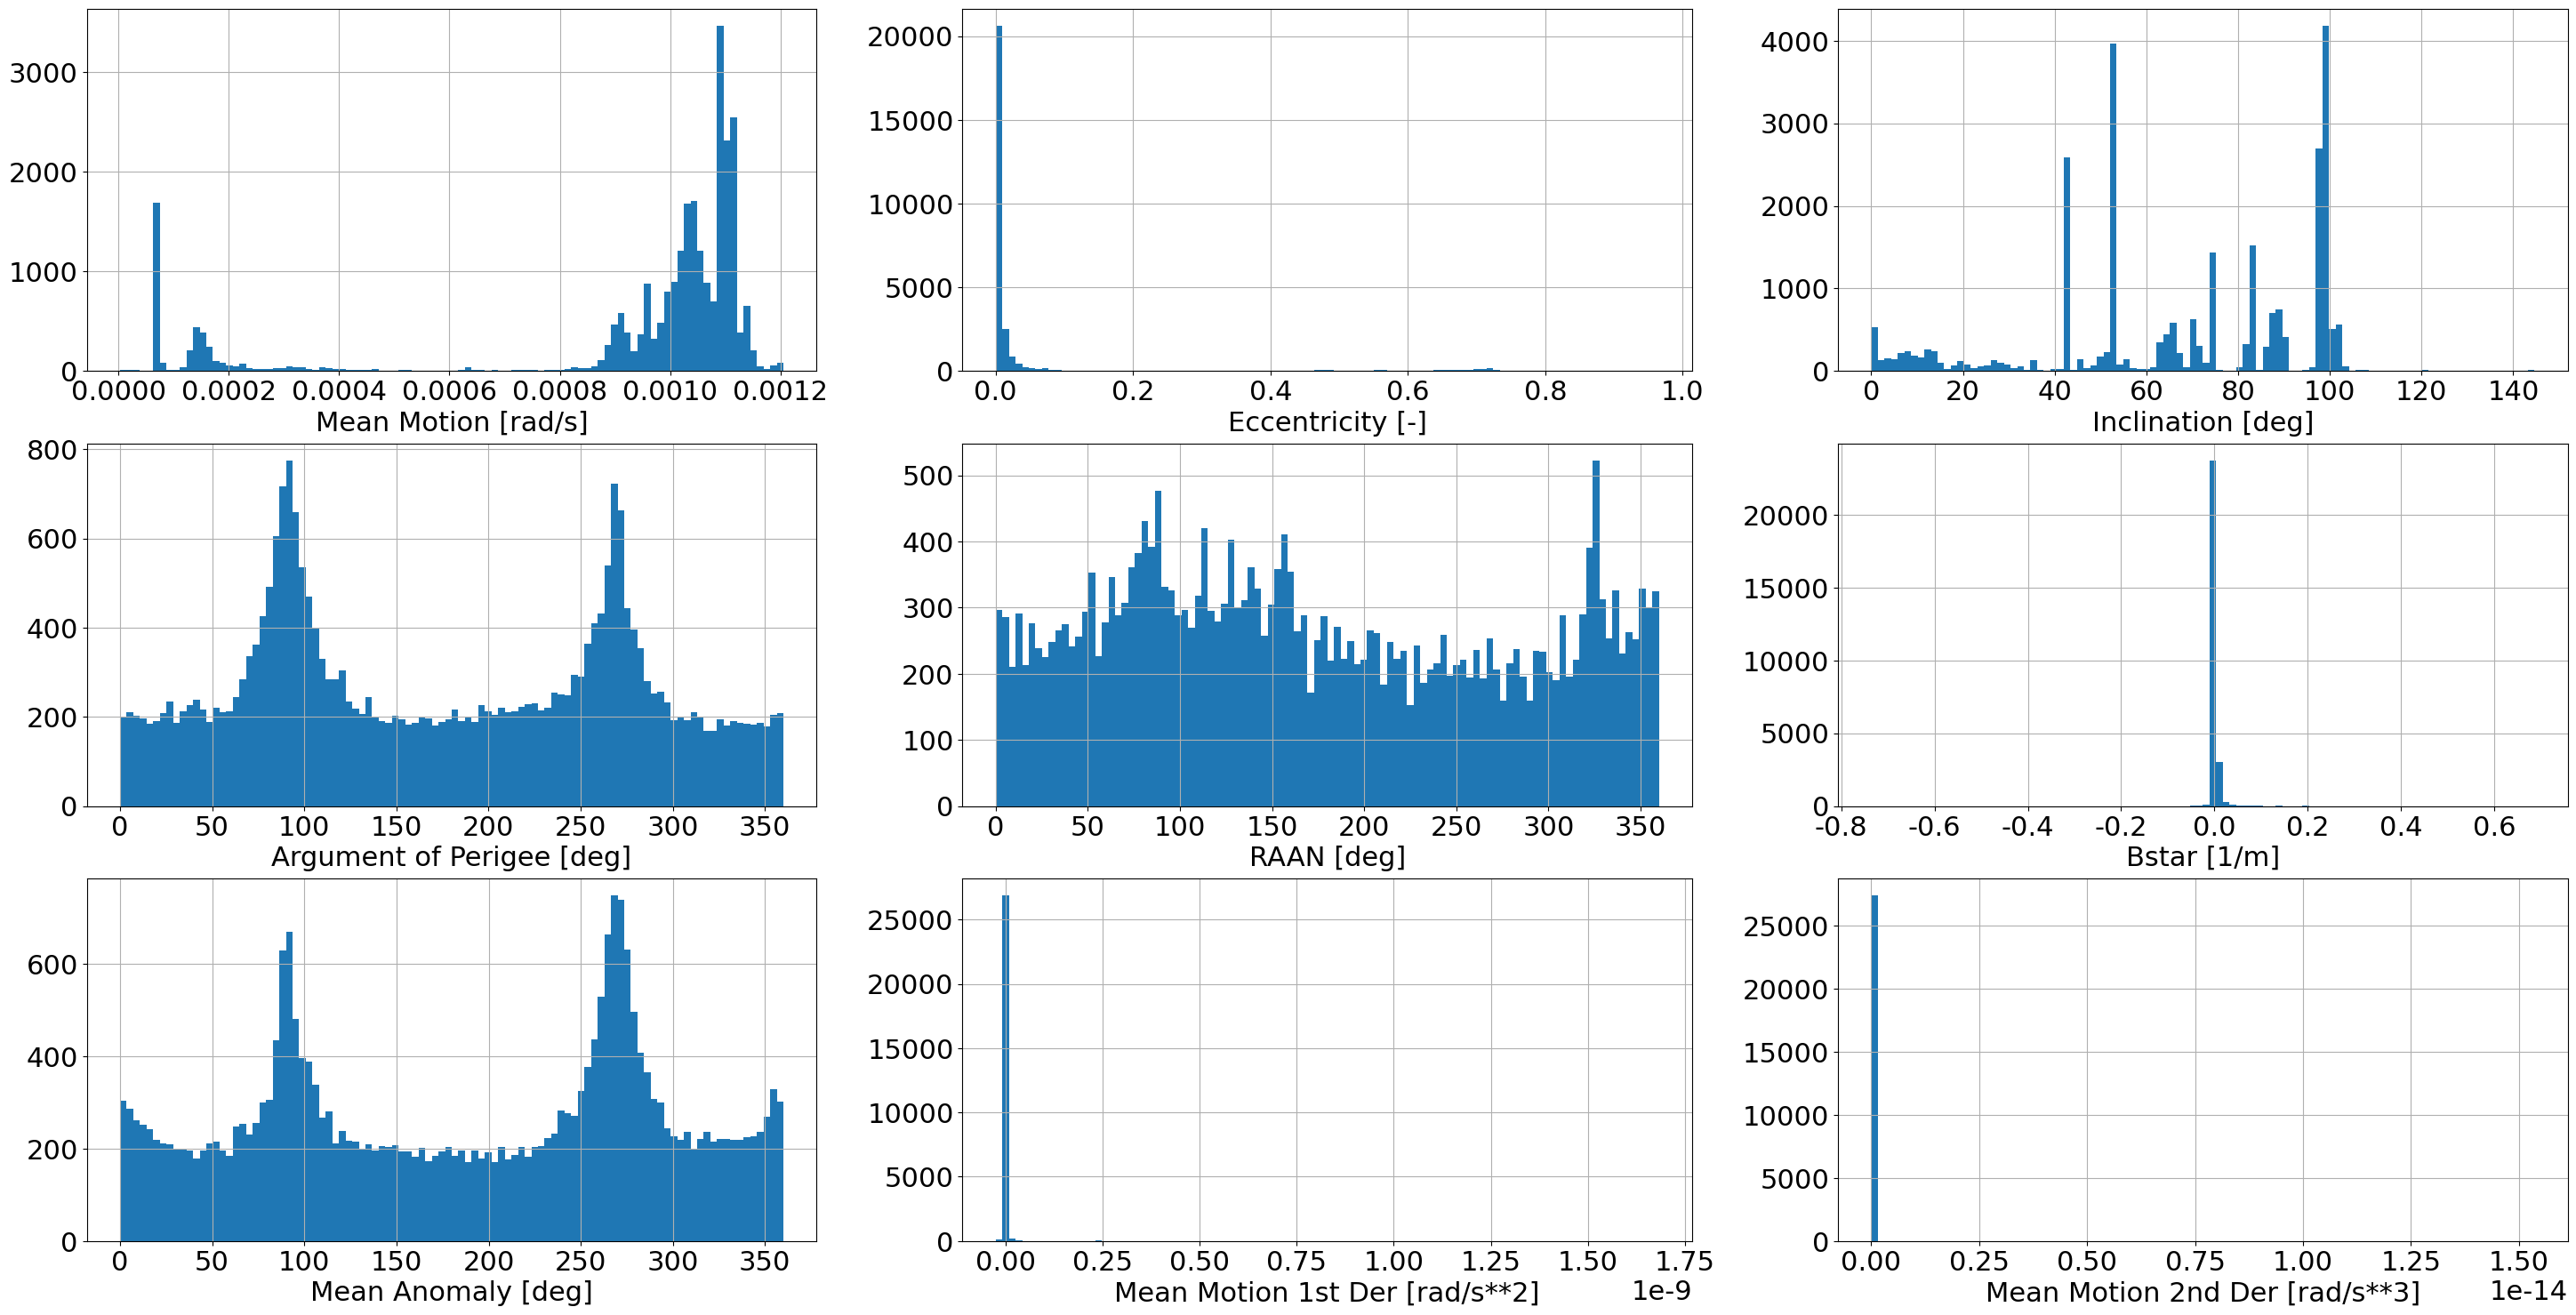

In [3]:
kessler.plot.plot_tles(tles)

## Plotting priors from TLEs

We can fit mixtures to the prior distribution and for instance use them as priors in the probabilistic programming module.

Here, we show how to display the prior :

In [4]:
priors=kessler.util.create_priors_from_tles(tles, mixture_components = {'mean_motion': 5, 'eccentricity': 5, 'inclination': 13, 'b_star': 4})

In [5]:
#we also extract the mean motion alues from the TLEs, to then have the minimum and maximum values for the mean motion priors (else the priors will be wide and you cannot see anything)
mean_motions=[el.mean_motion for el in tles]

/Users/ga00693/miniconda3/envs/kessler/lib/python3.12/site-packages/torch/distributions/distribution.py:307: UserWarning: <class 'pyro.distributions.torch.MixtureSameFamily'> does not define `support` to enable sample validation. Please initialize the distribution with `validate_args=False` to turn off validation.
  warnings.warn(


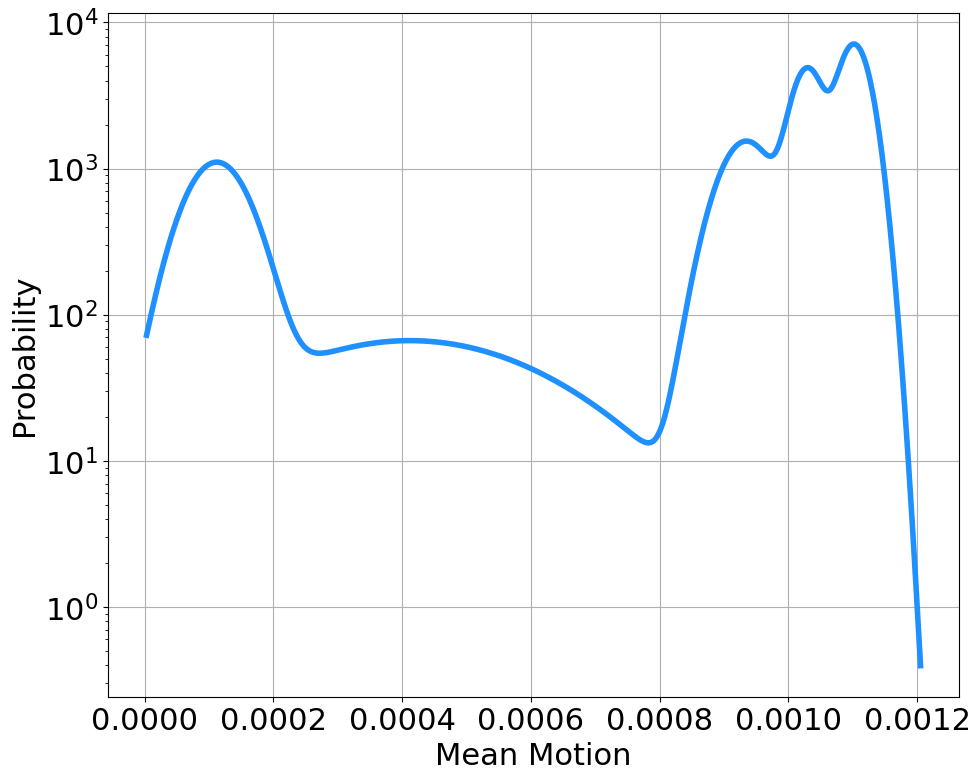

<Axes: xlabel='Mean Motion', ylabel='Probability'>

In [6]:
kessler.plot.plot_mix(mix = priors['mean_motion_prior'], 
                      min_val=np.min(mean_motions), 
                      max_val=np.max(mean_motions), 
                      log_yscale=True,
                      xlabel='Mean Motion',
                      figsize=(10,8),
                      linewidth=4.,
                      color='dodgerblue',
                      resolution=1000)

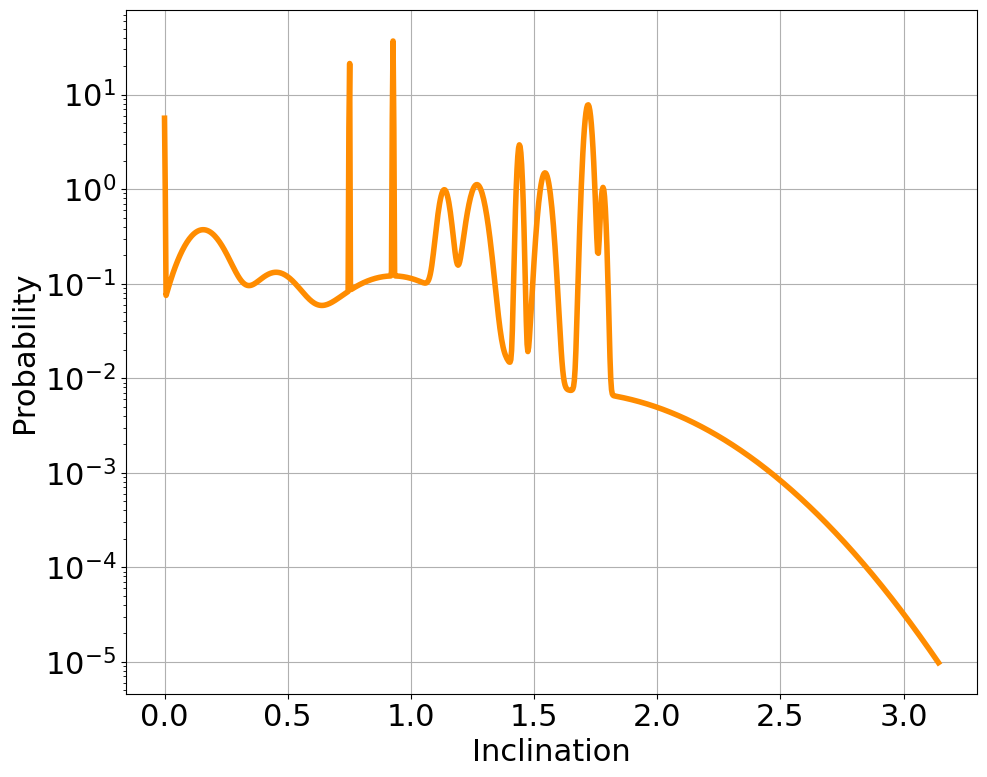

<Axes: xlabel='Inclination', ylabel='Probability'>

In [7]:
kessler.plot.plot_mix(mix = priors['inclination_prior'], 
                      min_val=0., 
                      max_val=np.pi, 
                      log_yscale=True,
                      xlabel='Inclination',
                      figsize=(10,8),
                      linewidth=4.,
                      color='darkorange',
                      resolution=1000)

## Plotting Orbit from Trace

Let's load the generated trace:

In [8]:
#save to pickle the trace:
with open('trace.pickle', 'rb') as f:
    trace = pickle.load(f)

<Axes: xlabel='y', ylabel='z'>

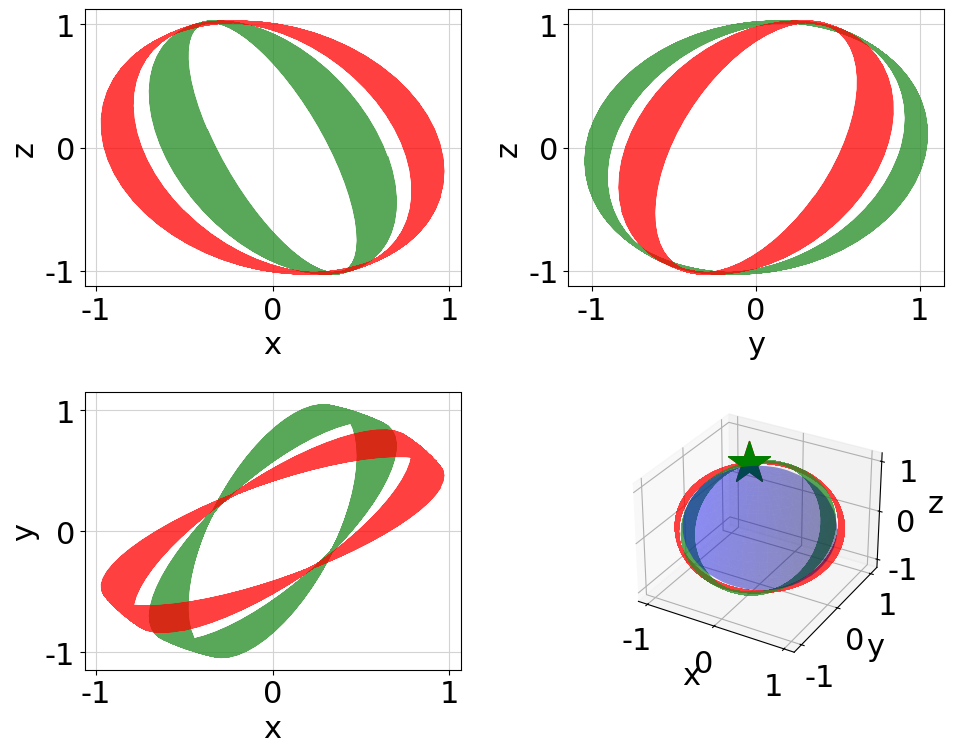

In [9]:
kessler.plot.plot_trace_orbit(trace=trace)